In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pingouin as pg
import hvplot.pandas
import geopandas as gpd

In [8]:
#Imported CSV
df = pd.read_csv('./Cleaned Data/california_wildfire_data_cleaned.csv')

In [11]:
df.head(3)

,Unnamed: 0,Incident Name,County,Administrative Unit,Acres Burned,Crews Involved,Dozers,Engines,Fatalities,Helicopters,...,Personnel Involved,Structures Damaged,Structures Destroyed,Structures Threatened,Water Tenders,Fire Started,Fire Extinguished,Longitude,Latitude,Incident ID
0,0,River Fire,Inyo,CAL FIRE San Bernardino Unit,407.0,25.0,25.0,25.0,0.0,0.0,...,476.0,0.0,0.0,0.0,25.0,2013-02-24T08:16:00Z,2013-02-28T20:00:00Z,-118.016510,36.602575,094719ba-a47b-4abb-9ec5-a506b2b9fd23
1,1,Fawnskin Fire,San Bernardino,San Bernardino National Forest,30.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2013-04-20T17:30:00Z,2013-04-22T09:00:00Z,-116.941311,34.288877,58f89ff8-bd3e-4355-b1c0-8fa05c747d3f
2,2,Gold Fire,Madera,CAL FIRE Madera-Mariposa-Merced Unit,274.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2013-04-30T12:59:00Z,2013-05-01T07:00:00Z,-119.635004,37.116295,357ffc13-bef9-48eb-810f-c5de851972eb


In [13]:
#Retained onl the relevant columns for analysis
df =df[['Incident Name','County','Acres Burned','Fire Started','Fire Extinguished', 'Longitude', 'Latitude', 'Incident ID']]

In [15]:
df.head(3)

,Incident Name,County,Acres Burned,Fire Started,Fire Extinguished,Longitude,Latitude,Incident ID
0,River Fire,Inyo,407.0,2013-02-24T08:16:00Z,2013-02-28T20:00:00Z,-118.016510,36.602575,094719ba-a47b-4abb-9ec5-a506b2b9fd23
1,Fawnskin Fire,San Bernardino,30.0,2013-04-20T17:30:00Z,2013-04-22T09:00:00Z,-116.941311,34.288877,58f89ff8-bd3e-4355-b1c0-8fa05c747d3f
2,Gold Fire,Madera,274.0,2013-04-30T12:59:00Z,2013-05-01T07:00:00Z,-119.635004,37.116295,357ffc13-bef9-48eb-810f-c5de851972eb


In [17]:
df.shape

(2779, 8)

## EDA on Acres Burned

In [20]:
pd.options.display.float_format = '{:.2f}'.format
df['Acres Burned'].describe()

count      2779.00
mean       4276.28
std       35190.50
min           0.00
25%          30.00
50%          83.00
75%         348.00
max     1032648.00
Name: Acres Burned, dtype: float64

 - Mean (4,276 acres) is much higher than the median (83 acres)
 - Right-skewed distribution (few massive wildfires).
 - High standard devation indicating high varaiability
 - 75% of fires burn <= 348 acres
 - 25% of fires burned <= 30 acres - most fires are small

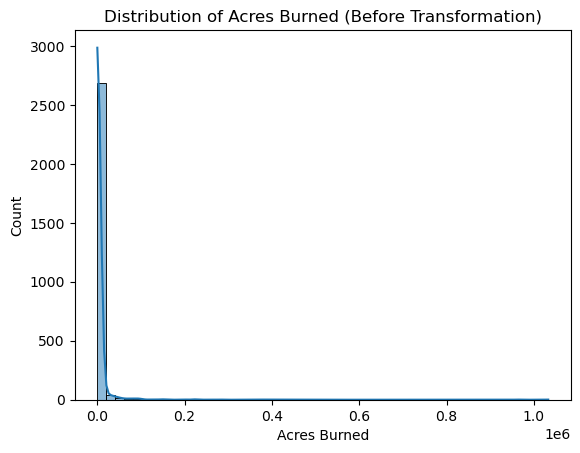

In [22]:
#Plot the Acres Burned distribution before transformation
sns.histplot(df['Acres Burned'], bins=50, kde=True)
plt.title("Distribution of Acres Burned (Before Transformation)")
plt.xlabel("Acres Burned")
plt.show()

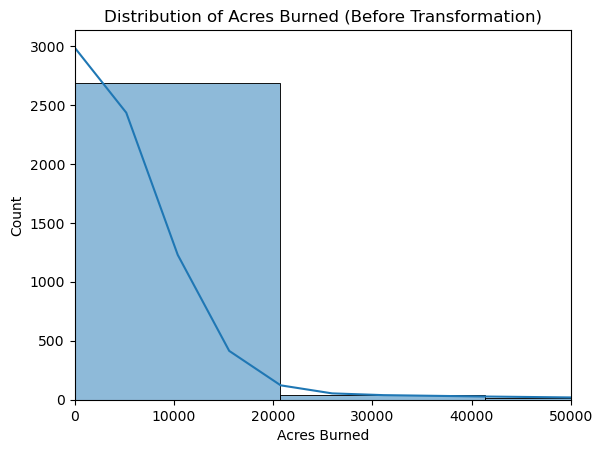

In [24]:
##Plot the Acres Burned distribution before transformation with x-axis limit of 50,000
sns.histplot(df['Acres Burned'], bins=50, kde=True)
plt.xlim(0, 50000)
plt.title("Distribution of Acres Burned (Before Transformation)")
plt.xlabel("Acres Burned")
plt.show()

In [26]:
# Add a new column with a Log Trasformation of Acres burned
df['Acres Burned Log'] = np.log1p(df['Acres Burned'])

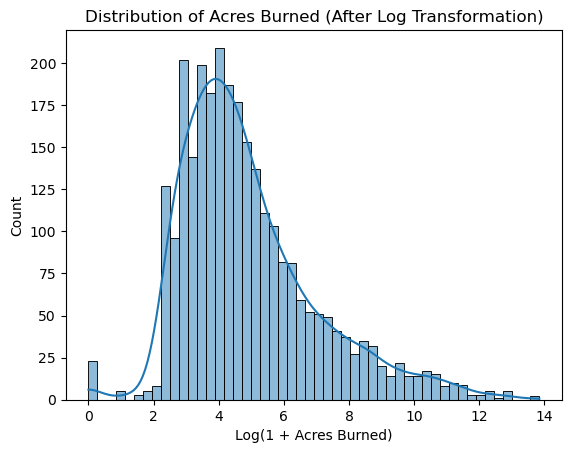

In [28]:
#Plot the Acres Burned distribution after transformation
sns.histplot(df['Acres Burned Log'], bins=50, kde=True)
plt.title("Distribution of Acres Burned (After Log Transformation)")
plt.xlabel("Log(1 + Acres Burned)")
plt.show()

## Hypothesis 
 - Null Hypothesis: Thers is no signifficant difference in the average acres burned between counties
 - Alternative Hypothesis : There is a significant difference in the average acres burned between counties.

In [31]:
#filter and keep only Acres Burned greater than 100 acres
df =df[df['Acres Burned']> 100]

In [33]:
df.shape

(1254, 9)

In [35]:
#Display top 10 counties with the most wildfire
df.groupby('County')['Acres Burned'].count().sort_values(ascending=False).head(10)

County
Kern               93
Riverside          86
Los Angeles        67
San Diego          58
Fresno             56
San Luis Obispo    46
Siskiyou           43
San Bernardino     43
Tulare             37
Butte              37
Name: Acres Burned, dtype: int64

In [39]:
#Create an idex with top 10 counties
top_counties = df['County'].value_counts().head(10).index
top_counties

Index(['Kern', 'Riverside', 'Los Angeles', 'San Diego', 'Fresno',
       'San Luis Obispo', 'Siskiyou', 'San Bernardino', 'Tulare', 'Butte'],
      dtype='object', name='County')

In [41]:
#keep only the top 10 counties
df = df[df['County'].isin(top_counties)]

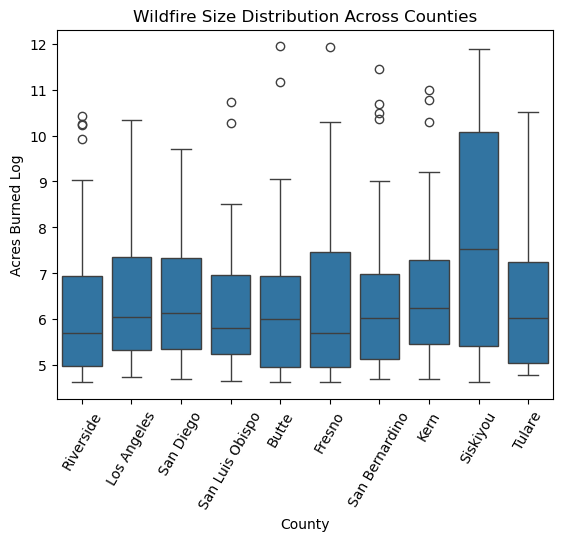

In [43]:
#Boxplot the top ten counties
sns.boxplot(x='County', y='Acres Burned Log', data= df)
plt.xticks(rotation = 60)
plt.title("Wildfire Size Distribution Across Counties")
plt.show()

In [45]:
#Describe the top ten counties
df.groupby('County')['Acres Burned Log'].describe()

,count,mean,std,min,25%,50%,75%,max
County,,,,,,,,
Butte,37.00,6.42,1.78,4.64,4.97,6.00,6.95,11.94
Fresno,56.00,6.40,1.82,4.63,4.96,5.69,7.47,11.93
Kern,93.00,6.53,1.35,4.71,5.46,6.25,7.30,10.99
Los Angeles,67.00,6.57,1.56,4.74,5.33,6.05,7.35,10.34
Riverside,86.00,6.16,1.46,4.62,4.99,5.71,6.95,10.42
San Bernardino,43.00,6.45,1.73,4.71,5.14,6.03,6.99,11.44
San Diego,58.00,6.44,1.28,4.71,5.35,6.13,7.33,9.70
San Luis Obispo,46.00,6.24,1.37,4.66,5.24,5.82,6.97,10.74
Siskiyou,43.00,7.72,2.35,4.62,5.42,7.54,10.08,11.89


## Statistical Testing
- To compare means across multiple groups, we will use Anova statistical testing method
- First we will check the variances across the groups using Leven's test to decide which if One-way ANOVA is appropriate
    - If p-value is >= 0.05 groups have equal variance and One-way ANOVA is appropriate
    - If P-value is < 0.05 groups have unequal variance and Welch's Anova is appropriate

## Levene’s Test

In [49]:
counties = df['County'].unique()

groups =[df[df['County']== county]['Acres Burned Log'] for county in counties]


stat, P_value = stats.levene(*groups)

print(f"Levene's Test: {stat}, P-value: {P_value} ")

Levene's Test: 4.002920441751386, P-value: 5.662284548570341e-05 


- Since p-value < 0.05, meaning the variances across counties are significantly different and a standard ANOVA is not appropriate because it assumes equal variances which is not true for our data. 

## Welch's ANOVA 

In [53]:
anova = pg.welch_anova(dv='Acres Burned Log', between='County', data=df)
print(anova)

   Source  ddof1  ddof2    F  p-unc  np2
0  County      9 198.10 1.94   0.05 0.05


- since p-value(p-unc) = 0.05, right on the borderline and it **suggests weak evidence** that at least one county has significantly different acres
  burned mean 
- The effect size (np2) suggests a small effect size, meaning the difference betweeen counties is not very large

## Post-hoc Analysis

In [57]:
posthoc = pg.pairwise_gameshowell(dv='Acres Burned Log', between='County', data=df)
significant_results = posthoc[posthoc['pval'] < 0.05]
significant_results

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
33,Riverside,Siskiyou,6.16,7.72,-1.56,0.39,-3.99,58.81,0.01,-0.86
42,San Luis Obispo,Siskiyou,6.24,7.72,-1.49,0.41,-3.62,66.72,0.02,-0.77


- This are the counties with a significant difference in acres burned, since p-value is less than 0.05
- Siskiyou stand out as having a significantly different average acres burned compared to the other counties involved in the comparisons

In [60]:
import warnings
warnings.filterwarnings("ignore")
plt_county = df.groupby('County').apply(lambda x: x.sample(n=1)).reset_index(drop=True)

In [62]:
plt_county.hvplot.points('Longitude', 'Latitude',
                geo = True,
                color='County',
                size=10*20,         
                alpha=0.8,
                frame_width= 900,
                 frame_height = 500,
                tiles='OSM'
)

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (County)

In [63]:
df.groupby('County')['Acres Burned'].sum().sort_values(ascending=False)

County
Siskiyou          720696.00
Fresno            303598.00
Butte             265835.00
Kern              242579.00
San Bernardino    237249.00
Los Angeles       197957.00
Riverside         184273.00
Tulare            107909.00
San Luis Obispo   107823.00
San Diego          90328.00
Name: Acres Burned, dtype: float64

## Hypothesis Testing Without Siskiyou County 

In [65]:
df = df[df['County'] != 'Siskiyou']

In [66]:
df['County'].unique()

array(['Riverside', 'Los Angeles', 'San Diego', 'San Luis Obispo',
       'Butte', 'Fresno', 'San Bernardino', 'Kern', 'Tulare'],
      dtype=object)

## Welch's ANOVA 

In [68]:
anova = pg.welch_anova(dv='Acres Burned Log', between='County', data=df)
print(anova)

   Source  ddof1  ddof2    F  p-unc  np2
0  County      8 186.06 0.59   0.79 0.01


- After removing Siskiyou county we did the same Welch's Anova test and the P-value now is 0.79(very high). This means there is no significant
  difference in average acres burned between the remaining 9 counties.
- The Effec size(nps) is 0.01, very small and this suggests that county differences explain almost none(1%) of the variance in acres burned.

## Conclusion

### Fail to reject the null hypothesis:
  - After removing Siskiyou County, there is no statistical evidence that wildfire acres burned differs between the remaining 9 counties.
  - Previous significance was driven by Siskiyou County. This confirms that Siskiyou was the main driver of differences in the original test.
  - without Siskiyou, county does not seem to affect acres burned significantly.